In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [110]:
bike_sharing_overall = pd.read_csv("C:\\Users\\USER\\Downloads\\bike_sharing.csv")
bike_sharing_overall.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [111]:
bike_sharing_overall.shape

(730, 16)

In [112]:
#checking for datatypes of columns
bike_sharing_overall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [113]:
#checking for null values in dataset

count=bike_sharing_overall.isnull().sum()
print(count)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [114]:
#Get basic idea of data using describe()
bike_sharing_overall.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [115]:
#we can see column dteday and yr month are having same data so we can drop dteday to avoid confusion

bike_sharing_overall.drop(['dteday'],axis=1,inplace=True)
bike_sharing_overall.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [116]:
#we know that casual+registered=cnt and cnt is our target variable so we will not consider casual and registered
bike_sharing_overall.drop(['casual','registered'],axis=1,inplace=True)
bike_sharing_overall.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [117]:
#from data we can see that: season,yr,mnth,holiday,weekday,workingday,weathersit all are categorical variables
#replace season,weekday and weathersit with appropriate values

bike_sharing_overall['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
bike_sharing_overall.head()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [118]:
bike_sharing_overall['weathersit'].replace({1:"Clear",2:"Mist",3:"Light rain",4:'Heavy Rain'},inplace=True)
bike_sharing_overall.head(10)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,2,spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,3,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,4,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,5,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,6,spring,0,1,0,4,1,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,7,spring,0,1,0,5,1,Mist,8.057402,10.44195,49.8696,11.304642,1510
7,8,spring,0,1,0,6,0,Mist,6.765000,8.11270,53.5833,17.875868,959
8,9,spring,0,1,0,0,0,Clear,5.671653,5.80875,43.4167,24.250650,822
9,10,spring,0,1,0,1,1,Clear,6.184153,7.54440,48.2917,14.958889,1321


In [119]:
bike_sharing_overall['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
bike_sharing_overall.head(10)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,spring,0,1,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,2,spring,0,1,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,3,spring,0,1,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,4,spring,0,1,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,5,spring,0,1,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,6,spring,0,1,0,Thursday,1,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,7,spring,0,1,0,Friday,1,Mist,8.057402,10.44195,49.8696,11.304642,1510
7,8,spring,0,1,0,Saturday,0,Mist,6.765000,8.11270,53.5833,17.875868,959
8,9,spring,0,1,0,Sunday,0,Clear,5.671653,5.80875,43.4167,24.250650,822
9,10,spring,0,1,0,Monday,1,Clear,6.184153,7.54440,48.2917,14.958889,1321


In [120]:
bike_sharing_overall['mnth'].replace({1:"Jan",2:"feb",3:"mar",4:"apr",5:"may",6:"jun",7:"jul",8:"Aug",9:"sep",10:"oct",11:"nov",12:"dec"},inplace=True)
bike_sharing_overall.head(10)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,spring,0,Jan,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,2,spring,0,Jan,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,3,spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,4,spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,5,spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,6,spring,0,Jan,0,Thursday,1,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,7,spring,0,Jan,0,Friday,1,Mist,8.057402,10.44195,49.8696,11.304642,1510
7,8,spring,0,Jan,0,Saturday,0,Mist,6.765000,8.11270,53.5833,17.875868,959
8,9,spring,0,Jan,0,Sunday,0,Clear,5.671653,5.80875,43.4167,24.250650,822
9,10,spring,0,Jan,0,Monday,1,Clear,6.184153,7.54440,48.2917,14.958889,1321


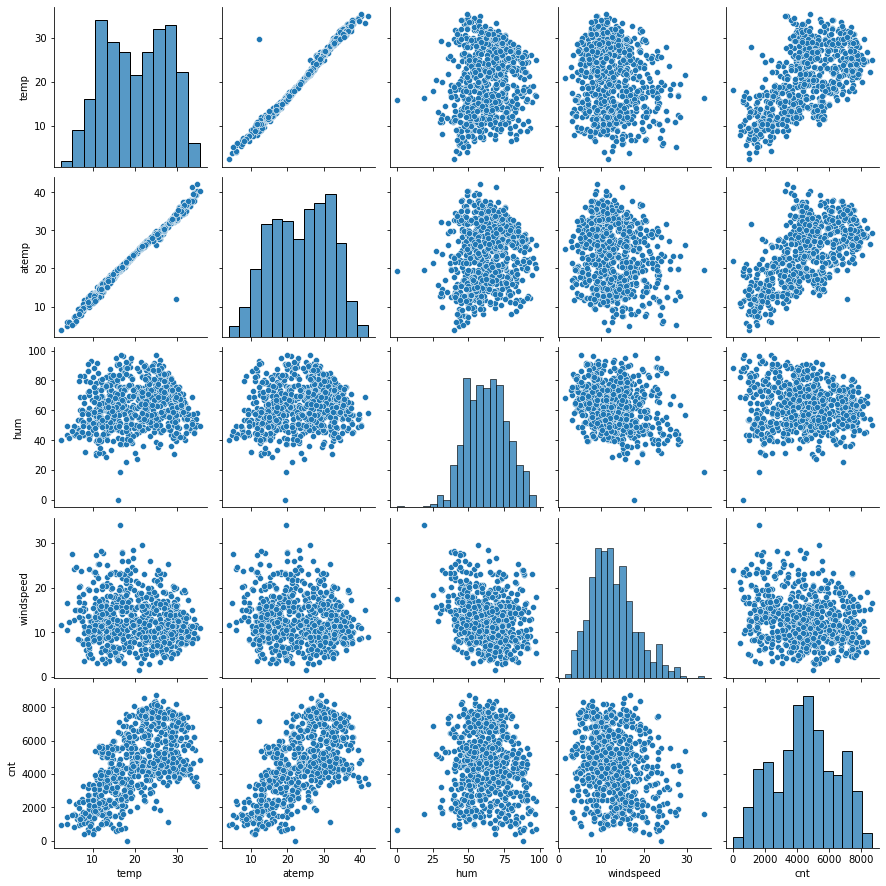

In [121]:
# creating a pairplot variables

sns.pairplot(bike_sharing_overall, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

# from above graphs we can say that temp and atemp have a relationship

In [122]:
# TO CHECK THE COLUMNS
bike_sharing_overall.columns

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

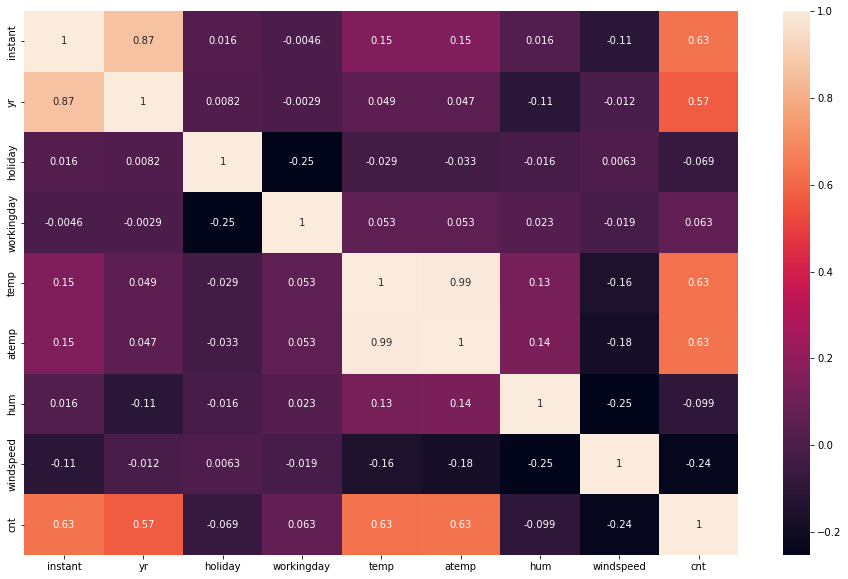

In [123]:
#let check the correlation
plt.figure(figsize =(16,10))
sns.heatmap(bike_sharing_overall.corr(), annot= True)
plt.show()

In [124]:
#correlation between temp and atemp is 0.99 which is almost 1
#Let us drop temp and consider atemp

bike_sharing_overall.drop(['temp'],axis=1,inplace=True)
bike_sharing_overall.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,spring,0,Jan,0,Saturday,0,Mist,18.18125,80.5833,10.749882,985
1,2,spring,0,Jan,0,Sunday,0,Mist,17.68695,69.6087,16.652113,801
2,3,spring,0,Jan,0,Monday,1,Clear,9.47025,43.7273,16.636703,1349
3,4,spring,0,Jan,0,Tuesday,1,Clear,10.60610,59.0435,10.739832,1562
4,5,spring,0,Jan,0,Wednesday,1,Clear,11.46350,43.6957,12.522300,1600


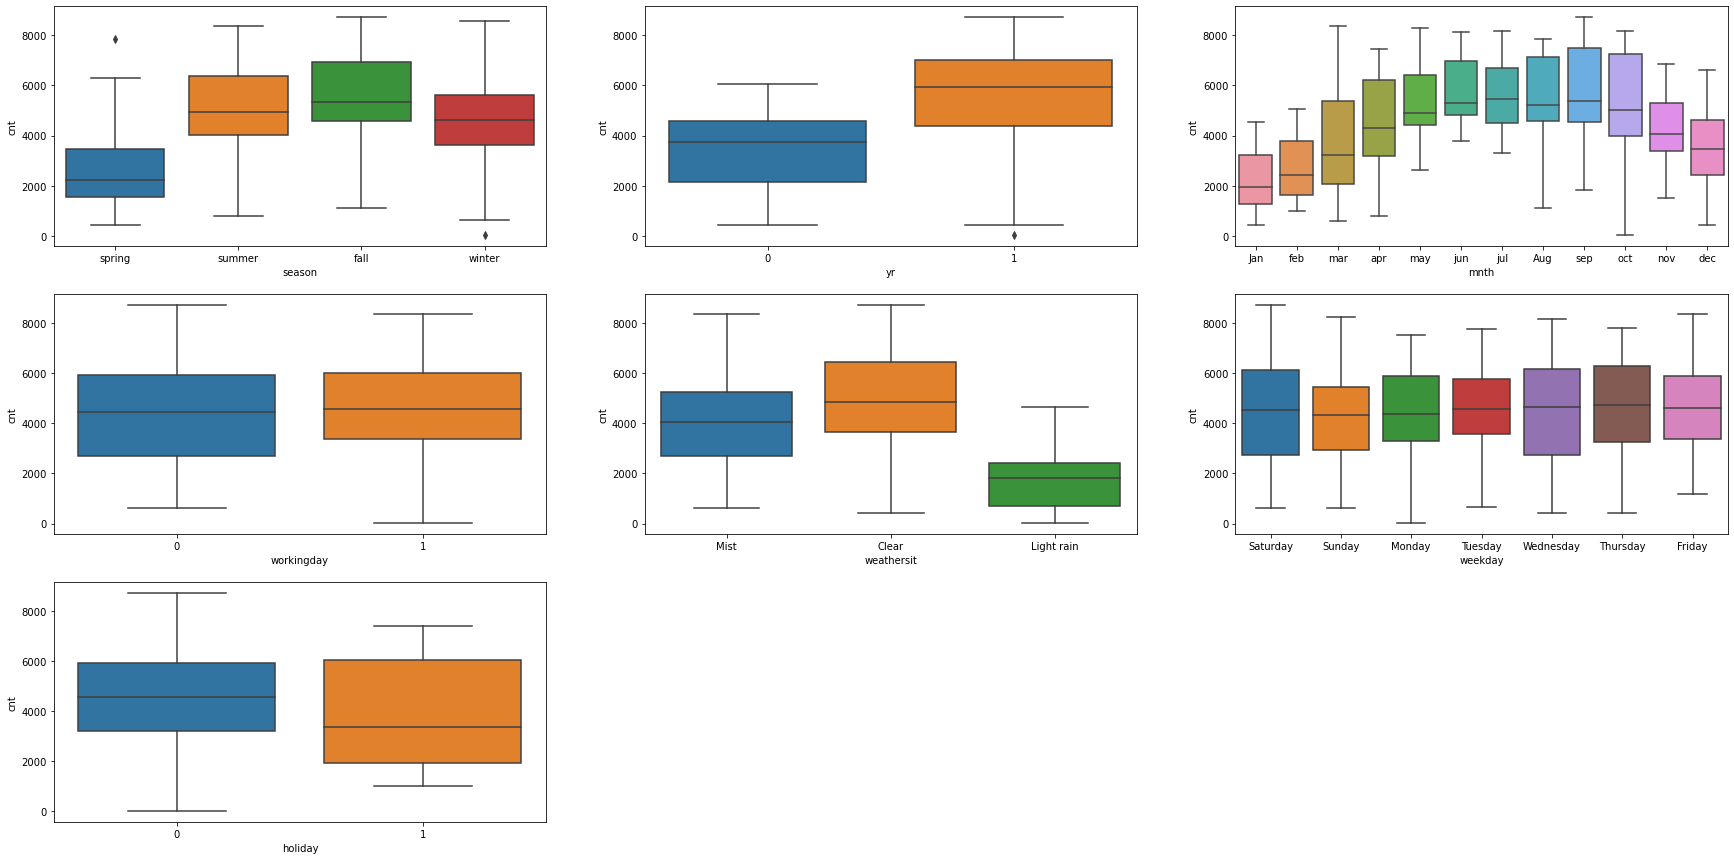

In [125]:
#Visualising categorical Variables to understand data better
plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing_overall)#yr','mnth','workingday','weathersit','weekday'
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_sharing_overall)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_sharing_overall)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_sharing_overall)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing_overall)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing_overall)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing_overall)
plt.show()

#Creating dummy variables

In [126]:
bike_sharing_overall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    object 
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    object 
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 68.6+ KB


In [32]:
#Convert variables to object type
#bike_sharing_overall['mnth']=bike_sharing_overall['mnth'].astype(object)
#bike_sharing_overall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    object 
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    object 
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 68.6+ KB


In [127]:
#CREATING DUMMY VARIABLES FOR CATEGORICAL DATA 

Season_condt=pd.get_dummies(bike_sharing_overall['season'],drop_first=True)
Weather_condt=pd.get_dummies(bike_sharing_overall['weathersit'],drop_first=True)
Day_of_week=pd.get_dummies(bike_sharing_overall['weekday'],drop_first=True)
Month=pd.get_dummies(bike_sharing_overall['mnth'],drop_first=True)

In [128]:
#Concatenating the dummy variables
bike_sharing_overall=pd.concat([bike_sharing_overall,Season_condt],axis=1)
bike_sharing_overall=pd.concat([bike_sharing_overall,Weather_condt],axis=1)
bike_sharing_overall=pd.concat([bike_sharing_overall,Day_of_week],axis=1)
bike_sharing_overall=pd.concat([bike_sharing_overall,Month],axis=1)

In [129]:
bike_sharing_overall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    object 
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    object 
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  spring      730 non-null    uint8  
 13  summer      730 non-null    uint8  
 14  winter      730 non-null    uint8  
 15  Light rain  730 non-null    uint8  
 16  Mist        730 non-null    uint8  
 17  Monday      730 non-null    uint8  
 18  Saturday    730 non-null    uint8  
 19  Sunday      730 non-null    u

In [130]:
#Deleting the orginal columns season.weathersit,weekday,mnth
bike_sharing_overall.drop(['season'],axis=1,inplace=True)
bike_sharing_overall.drop(['weathersit'],axis=1,inplace=True)

bike_sharing_overall.drop(['weekday'],axis=1,inplace=True)

bike_sharing_overall.drop(['mnth'],axis=1,inplace=True)

bike_sharing_overall.drop(['instant'],axis=1,inplace=True)

In [131]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_sharing_overall_train, bike_sharing_overall_train_test = train_test_split(bike_sharing_overall, train_size = 0.7, test_size = 0.3, random_state = 100)

In [132]:
#SCALING THE NUMERICAL DATA
scaler=MinMaxScaler()

In [133]:
num_var1=['atemp','hum','windspeed','cnt']
bike_sharing_overall_train[num_var1] = scaler.fit_transform(bike_sharing_overall_train[num_var1])

In [134]:
bike_sharing_overall_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,apr,dec,feb,jul,jun,mar,may,nov,oct,sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.078431,0.084314,0.066667,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.269113,0.278131,0.249689,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [135]:
#CREATING X AND Y
y_train = bike_sharing_overall_train.pop('cnt')
X_train = bike_sharing_overall_train

In [136]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,Light rain,...,apr,dec,feb,jul,jun,mar,may,nov,oct,sep
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [137]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [138]:
#USING RFE APPROACH FOR FEATURE SELECTION
# WE START WITH 15 VARS AND WILL USE MIXED APPROACH TO BUILD A MODEL

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 15)            
rfe = rfe.fit(X_train, y_train)

In [140]:
cols = X_train.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'spring',
       'winter', 'Light rain', 'Mist', 'Saturday', 'Sunday', 'Jan', 'jul',
       'sep'],
      dtype='object')

In [141]:
X_train_rfe = X_train[cols]

#Model Building

In [142]:
#BUILDING MODEL USING STATSMODEL:
 
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [143]:
lm = sm.OLS(y_train,X_train_rfe1).fit()

In [144]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          1.66e-188
Time:                        20:54:39   Log-Likelihood:                 510.32
No. Observations:                 510   AIC:                            -990.6
Df Residuals:                     495   BIC:                            -927.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2535      0.026      9.914      0.0

In [145]:

vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,holiday,inf
3,workingday,inf
11,Saturday,inf
12,Sunday,inf
4,atemp,3.11
7,spring,2.66
5,hum,1.91
8,winter,1.75
10,Mist,1.57
13,Jan,1.56


# Dropping holiday 

In [146]:
X_train_rfe1.columns

Index(['const', 'yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'spring', 'winter', 'Light rain', 'Mist', 'Saturday', 'Sunday', 'Jan',
       'jul', 'sep'],
      dtype='object')

In [147]:
X_train_rfe1=X_train_rfe1.drop(['holiday'],axis=1)



In [148]:
X_train_rfe1

,const,yr,workingday,atemp,hum,windspeed,spring,winter,Light rain,Mist,Saturday,Sunday,Jan,jul,sep
653,1.0,1,1,0.501133,0.575354,0.300794,0,1,0,0,0,0,0,0,0
576,1.0,1,1,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,1,0
426,1.0,1,0,0.438975,0.640189,0.255342,1,0,0,1,1,0,0,0,0
728,1.0,1,0,0.200348,0.498067,0.663106,1,0,0,0,0,1,0,0,0
482,1.0,1,0,0.391735,0.504508,0.188475,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,1,0.762183,0.605840,0.355596,0,0,0,1,0,0,0,0,0
578,1.0,1,1,0.824359,0.679690,0.187140,0,0,0,0,0,0,0,0,0
53,1.0,0,1,0.218747,0.435939,0.111379,1,0,0,0,0,0,0,0,0
350,1.0,0,0,0.223544,0.577930,0.431816,0,1,0,1,1,0,0,0,0


In [149]:
# Creating model 2 after removing holiday
lm1 = sm.OLS(y_train,X_train_rfe1).fit()

In [150]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          1.66e-188
Time:                        20:59:02   Log-Likelihood:                 510.32
No. Observations:                 510   AIC:                            -990.6
Df Residuals:                     495   BIC:                            -927.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2510      0.040      6.252      0.0

In [151]:
vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,100.81
2,workingday,9.07
10,Saturday,6.06
11,Sunday,5.74
3,atemp,3.11
6,spring,2.66
4,hum,1.91
7,winter,1.75
9,Mist,1.57
12,Jan,1.56


In [152]:
#Dropping month "workingday" from the model for high VIF value
X_train_rfe1=X_train_rfe1.drop(['workingday'],axis=1)

In [159]:
# Creating model 3 after removing holiday
lm2 = sm.OLS(y_train,X_train_rfe1).fit()

In [160]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.5
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          1.65e-186
Time:                        22:39:17   Log-Likelihood:                 502.80
No. Observations:                 510   AIC:                            -977.6
Df Residuals:                     496   BIC:                            -918.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3474      0.032     10.921      0.0

In [161]:
vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,61.57
2,atemp,3.11
5,spring,2.66
3,hum,1.91
6,winter,1.74
8,Mist,1.57
11,Jan,1.56
12,jul,1.30
7,Light rain,1.25
4,windspeed,1.20


In [162]:
#Dropping month "Saturday" from the model for high VIF value
X_train_rfe1=X_train_rfe1.drop(['Saturday'],axis=1)

In [163]:
# Creating model 4 after removing holiday
lm3 = sm.OLS(y_train,X_train_rfe1).fit()

In [164]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     213.6
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          2.28e-187
Time:                        22:42:10   Log-Likelihood:                 502.05
No. Observations:                 510   AIC:                            -978.1
Df Residuals:                     497   BIC:                            -923.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3508      0.032     11.067      0.0

In [165]:
vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,61.08
2,atemp,3.11
5,spring,2.66
3,hum,1.90
6,winter,1.74
8,Mist,1.57
10,Jan,1.56
11,jul,1.30
7,Light rain,1.25
4,windspeed,1.20


In [166]:
#ADDING Mar month  AND CHECKING IF MODEL IMPROVES

X_train_rfe1['mar']=X_train['mar']
X_train_rfe1.head()

,const,yr,atemp,hum,windspeed,spring,winter,Light rain,Mist,Sunday,Jan,jul,sep,mar
653,1.0,1,0.501133,0.575354,0.300794,0,1,0,0,0,0,0,0,0
576,1.0,1,0.766351,0.725633,0.264686,0,0,0,0,0,0,1,0,0
426,1.0,1,0.438975,0.640189,0.255342,1,0,0,1,0,0,0,0,1
728,1.0,1,0.200348,0.498067,0.663106,1,0,0,0,1,0,0,0,0
482,1.0,1,0.391735,0.504508,0.188475,0,0,0,1,0,0,0,0,0


In [170]:
# Creating model 5 after removing holiday
lm4 = sm.OLS(y_train,X_train_rfe1).fit()

In [173]:
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     198.0
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          9.55e-187
Time:                        23:08:35   Log-Likelihood:                 503.37
No. Observations:                 510   AIC:                            -978.7
Df Residuals:                     496   BIC:                            -919.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3451      0.032     10.836      0.0

In [172]:
vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,61.85
2,atemp,3.14
5,spring,2.83
3,hum,1.90
6,winter,1.78
10,Jan,1.77
8,Mist,1.57
11,jul,1.30
13,mar,1.30
7,Light rain,1.25


In [174]:
#Dropping month "mar" from the model for high VIF value
X_train_rfe1=X_train_rfe1.drop(['mar'],axis=1)

In [175]:
#ADDING May month  AND CHECKING IF MODEL IMPROVES

X_train_rfe1['may']=X_train['may']
X_train_rfe1.head()

,const,yr,atemp,hum,windspeed,spring,winter,Light rain,Mist,Sunday,Jan,jul,sep,may
653,1.0,1,0.501133,0.575354,0.300794,0,1,0,0,0,0,0,0,0
576,1.0,1,0.766351,0.725633,0.264686,0,0,0,0,0,0,1,0,0
426,1.0,1,0.438975,0.640189,0.255342,1,0,0,1,0,0,0,0,0
728,1.0,1,0.200348,0.498067,0.663106,1,0,0,0,1,0,0,0,0
482,1.0,1,0.391735,0.504508,0.188475,0,0,0,1,0,0,0,0,0


In [176]:
# Creating model 6 after removing holiday
lm5 = sm.OLS(y_train,X_train_rfe1).fit()

In [177]:
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     199.2
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          2.79e-187
Time:                        23:11:31   Log-Likelihood:                 504.64
No. Observations:                 510   AIC:                            -981.3
Df Residuals:                     496   BIC:                            -922.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3498      0.032     11.080      0.0

In [178]:
vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,61.09
2,atemp,3.11
5,spring,2.79
3,hum,1.95
6,winter,1.89
8,Mist,1.57
10,Jan,1.56
11,jul,1.34
7,Light rain,1.26
13,may,1.22


In [181]:
#ADDING May month  AND CHECKING IF MODEL IMPROVES

X_train_rfe1['jun']=X_train['jun']
X_train_rfe1.head()

,const,yr,atemp,hum,windspeed,spring,winter,Light rain,Mist,Sunday,Jan,jul,sep,may,jun
653,1.0,1,0.501133,0.575354,0.300794,0,1,0,0,0,0,0,0,0,0
576,1.0,1,0.766351,0.725633,0.264686,0,0,0,0,0,0,1,0,0,0
426,1.0,1,0.438975,0.640189,0.255342,1,0,0,1,0,0,0,0,0,0
728,1.0,1,0.200348,0.498067,0.663106,1,0,0,0,1,0,0,0,0,0
482,1.0,1,0.391735,0.504508,0.188475,0,0,0,1,0,0,0,0,0,0


In [182]:
# Creating model 7 after removing holiday
lm6 = sm.OLS(y_train,X_train_rfe1).fit()

In [183]:
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.6
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          4.01e-186
Time:                        23:15:43   Log-Likelihood:                 504.64
No. Observations:                 510   AIC:                            -979.3
Df Residuals:                     495   BIC:                            -915.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3497      0.032     11.057      0.0

In [184]:
vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,61.20
2,atemp,3.40
5,spring,2.82
3,hum,1.97
6,winter,1.95
8,Mist,1.57
10,Jan,1.57
11,jul,1.53
14,jun,1.37
13,may,1.30


In [185]:
#Dropping month "jun" from the model for high p value
X_train_rfe1=X_train_rfe1.drop(['jun'],axis=1)

In [186]:
#ADDING Sep month  AND CHECKING IF MODEL IMPROVES

X_train_rfe1['sep']=X_train['sep']
X_train_rfe1.head()

,const,yr,atemp,hum,windspeed,spring,winter,Light rain,Mist,Sunday,Jan,jul,sep,may
653,1.0,1,0.501133,0.575354,0.300794,0,1,0,0,0,0,0,0,0
576,1.0,1,0.766351,0.725633,0.264686,0,0,0,0,0,0,1,0,0
426,1.0,1,0.438975,0.640189,0.255342,1,0,0,1,0,0,0,0,0
728,1.0,1,0.200348,0.498067,0.663106,1,0,0,0,1,0,0,0,0
482,1.0,1,0.391735,0.504508,0.188475,0,0,0,1,0,0,0,0,0


In [187]:
# Creating model 8 after removing holiday
lm7 = sm.OLS(y_train,X_train_rfe1).fit()

In [188]:
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     199.2
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          2.79e-187
Time:                        23:26:12   Log-Likelihood:                 504.64
No. Observations:                 510   AIC:                            -981.3
Df Residuals:                     496   BIC:                            -922.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3498      0.032     11.080      0.0

In [189]:
vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,61.09
2,atemp,3.11
5,spring,2.79
3,hum,1.95
6,winter,1.89
8,Mist,1.57
10,Jan,1.56
11,jul,1.34
7,Light rain,1.26
13,may,1.22


In [190]:
#ADDING Oct month  AND CHECKING IF MODEL IMPROVES

X_train_rfe1['oct']=X_train['oct']
X_train_rfe1.head()

,const,yr,atemp,hum,windspeed,spring,winter,Light rain,Mist,Sunday,Jan,jul,sep,may,oct
653,1.0,1,0.501133,0.575354,0.300794,0,1,0,0,0,0,0,0,0,1
576,1.0,1,0.766351,0.725633,0.264686,0,0,0,0,0,0,1,0,0,0
426,1.0,1,0.438975,0.640189,0.255342,1,0,0,1,0,0,0,0,0,0
728,1.0,1,0.200348,0.498067,0.663106,1,0,0,0,1,0,0,0,0,0
482,1.0,1,0.391735,0.504508,0.188475,0,0,0,1,0,0,0,0,0,0


In [191]:
# Creating model 9 after removing holiday
lm8 = sm.OLS(y_train,X_train_rfe1).fit()

In [192]:
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.9
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          1.04e-187
Time:                        23:45:08   Log-Likelihood:                 508.42
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     495   BIC:                            -923.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3661      0.032     11.464      0.0

In [193]:
vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,63.30
2,atemp,3.30
5,spring,2.83
6,winter,2.51
3,hum,1.95
8,Mist,1.57
10,Jan,1.56
14,oct,1.53
11,jul,1.35
7,Light rain,1.27


In [199]:
#ADDING dec month  AND CHECKING IF MODEL IMPROVES

X_train_rfe1['dec']=X_train['dec']
X_train_rfe1.head()

,const,yr,atemp,hum,windspeed,spring,winter,Light rain,Mist,Sunday,Jan,jul,sep,may,oct,dec
653,1.0,1,0.501133,0.575354,0.300794,0,1,0,0,0,0,0,0,0,1,0
576,1.0,1,0.766351,0.725633,0.264686,0,0,0,0,0,0,1,0,0,0,0
426,1.0,1,0.438975,0.640189,0.255342,1,0,0,1,0,0,0,0,0,0,0
728,1.0,1,0.200348,0.498067,0.663106,1,0,0,0,1,0,0,0,0,0,1
482,1.0,1,0.391735,0.504508,0.188475,0,0,0,1,0,0,0,0,0,0,0


In [195]:
# Creating model 10 after removing holiday
lm9 = sm.OLS(y_train,X_train_rfe1).fit()

In [196]:
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.4
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          8.84e-187
Time:                        23:56:04   Log-Likelihood:                 508.93
No. Observations:                 510   AIC:                            -985.9
Df Residuals:                     494   BIC:                            -918.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3678      0.032     11.501      0.0

In [200]:
vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,const,63.49
2,atemp,3.37
5,spring,2.85
6,winter,2.76
3,hum,1.98
14,oct,1.69
10,Jan,1.63
8,Mist,1.57
15,dec,1.38
11,jul,1.36


In [201]:
#Dropping month "dec" from the model for high p value

X_train_rfe1 = X_train_rfe1.drop(['dec'],axis=1)

#we have consider columns and concluded that our model lm8 seems to give good result

In [202]:
#Predict values
y_train_cnt = lm8.predict(X_train_rfe1)

In [203]:
#CALCULATING RESIDUALS

res=y_train - y_train_cnt

Text(0.5, 0, 'Errors')

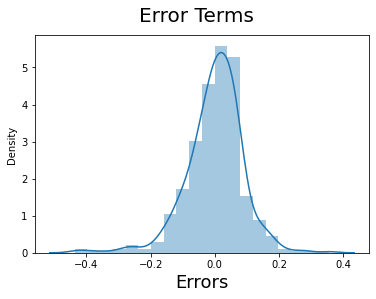

In [204]:
#Checking ASSUMPTION OF NORMALITY:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

In [205]:
#Checking columns
X_train_rfe1.columns

Index(['const', 'yr', 'atemp', 'hum', 'windspeed', 'spring', 'winter',
       'Light rain', 'Mist', 'Sunday', 'Jan', 'jul', 'sep', 'may', 'oct'],
      dtype='object')

In [206]:
print(X_train_rfe1.shape)
print(res.shape)

(510, 15)
(510,)


In [207]:
#Scaling the test data

num_var1=['atemp','hum','windspeed','cnt']
bike_sharing_overall_train_test[num_var1] = scaler.fit_transform(bike_sharing_overall_train_test[num_var1])

In [208]:
#Creating x and y sets

y_test = bike_sharing_overall_train_test.pop('cnt')
X_test = bike_sharing_overall_train_test

In [209]:
X_train_new=X_train_rfe1.drop(['const'], axis=1)

In [210]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [211]:
#Making predictions on the chosen model

y_pred = lm8.predict(X_test_new)

Text(0, 0.5, 'y_pred')

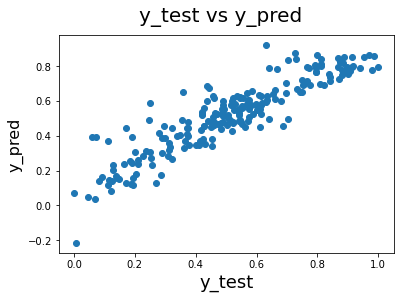

In [212]:
#CHECKING PREDICTED V/s TEST DATA 

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

#We have a model that seems good enough to predict demand of bikes. The actual and predicted cnt i.e demand significantly overlapped thus this model explain the demand very well.

In [214]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.10053220199401677

In [215]:
#Calculate the r square for test

r_squared = r2_score(y_test, y_pred)
r_squared

0.821808556224099

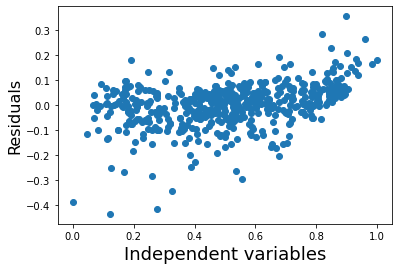

In [223]:
#PLotting the residuals to see if a pattern exists
#Checking assumption of homoscedasticity and autocorrelation
plt.figure()
plt.scatter(y_train,res)
fig.suptitle('Independent vars vs res', fontsize=20)              # Plot heading 
plt.xlabel('Independent variables', fontsize=18)                          # X-label
plt.ylabel('Residuals', fontsize=16)  
plt.show()

error term have constant varianance hence its not homoscedasticity

In [218]:
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.9
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          1.04e-187
Time:                        11:28:33   Log-Likelihood:                 508.42
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     495   BIC:                            -923.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3661      0.032     11.464      0.0

cnt = 0.3661 + (0.2338 x yr) +(0.4577 x atemp) - (0.1640 x hum) - (0.1676 x windspeed) - (0.1040 x spring) +(0.0316 x winter)
      -(0.2462 x Light rain) -(0.0569 x Mist) -(0.0438 x Sunday) - (0.0429 x jan)- (0.0570 x jul) + (0.0721 x sep) + (0.0371 x may)
     +(0.0481 x oct)
     
     
Conclusion:


     The Result shows that the data model demands for the bikes are depend on the Variables such us Year,atemp,Hmidity,           windspeed,seasons,weather and Months
     
     Demand increases when the temperature is fine and winter with various months like sep,may,oct.
     
     Demand decreases when the Humidity increases, if there is light rain and mist and in spring seasons, holidays in the         month of Jan and Jul.
     
      The Demand for the next year is dependant on the demand of this year.